# 1. Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)

# 2. Load Data
**NB: Spotify limits the amount of rows/observations on each each file to 10,000. Thus we have 3 files we need to load.**

In [2]:
df1 = pd.read_json('/Users/Abdillahi/Desktop/Uni/IM939-Data Science Across Disciplines- Principles, Practice and Critique /Assessment 2/MyData/StreamingHistory0.json')
df2 = pd.read_json('/Users/Abdillahi/Desktop/Uni/IM939-Data Science Across Disciplines- Principles, Practice and Critique /Assessment 2/MyData/StreamingHistory1.json')
df3 = pd.read_json('/Users/Abdillahi/Desktop/Uni/IM939-Data Science Across Disciplines- Principles, Practice and Critique /Assessment 2/MyData/StreamingHistory2.json')
df4 = pd.read_json('/Users/Abdillahi/Desktop/Uni/IM939-Data Science Across Disciplines- Principles, Practice and Critique /Assessment 2/MyData/StreamingHistory3.json')

# 3. Combine the data 

**Lets concatenate each of our dataframes into one.**

In [3]:
df = pd.concat([df1,df2,df3,df4],axis=0)

# Part 1. Data exploration

In [4]:
df.head()

,artistName,endTime,msPlayed,trackName
0,The Revivalists,2019-06-21 17:37,24008,Wish I Knew You
1,The Game,2019-06-30 23:54,277025,Dreams
2,The Game,2019-07-01 18:25,1173,Dreams
3,The Hundred In The Hands,2019-07-01 18:29,211586,Dressed In Dresden
4,Tennis,2019-07-01 18:30,1770,Marathon


### Check no. of rows and columns

In [5]:
df.shape

(37483, 4)

### Check for missing values

In [6]:
df.isnull().sum() 

artistName    0
endTime       0
msPlayed      0
trackName     0
dtype: int64

- **No missing values found within our data which is great**

### Check data types of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37483 entries, 0 to 7482
Data columns (total 4 columns):
artistName    37483 non-null object
endTime       37483 non-null object
msPlayed      37483 non-null int64
trackName     37483 non-null object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


- **Looks like endTime is not in datetime format when it should be. Lets convert it.**

### Convert endTime to datetime object

In [8]:
df['endTime'] =  pd.to_datetime(df['endTime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37483 entries, 0 to 7482
Data columns (total 4 columns):
artistName    37483 non-null object
endTime       37483 non-null datetime64[ns]
msPlayed      37483 non-null int64
trackName     37483 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
df.head()

,artistName,endTime,msPlayed,trackName
0,The Revivalists,2019-06-21 17:37:00,24008,Wish I Knew You
1,The Game,2019-06-30 23:54:00,277025,Dreams
2,The Game,2019-07-01 18:25:00,1173,Dreams
3,The Hundred In The Hands,2019-07-01 18:29:00,211586,Dressed In Dresden
4,Tennis,2019-07-01 18:30:00,1770,Marathon


- **A quick inspection of the first few rows shows that we have repeat data. Thus we can conclude that each track represents a single play and not unique plays.**

### How many tracks have I streamed since 21st June 2019 ?

In [11]:
df.shape[0]

37483

- **Looks like I've streamed just under 40k tracks**

### How many unique tracks have I streamed since 21st June 2019 ?

In [12]:
# len(df['trackName'].unique())

- **Initally I ran the code above, but realised that you can have songs with the same name. So this method wouldn't work**

In [13]:
len(set(df['artistName'] + df['trackName'])) # a better way of getting unique tracks

8417

In [14]:
df.groupby(['trackName','artistName']).count().shape # an alternative way

(8417, 2)

- **Around 8500 unqiue tracks streamed**

### Let's create a dataframe of just our unqique tracks. I have a feeling we'll need this later

In [15]:
df['artistPlusTrack'] = df['artistName'] + df['trackName']

In [16]:
uniqueTracksDf = df.drop_duplicates(subset=['artistPlusTrack'])
uniqueTracksDf.shape

(8417, 5)

### What 10 songs have I listened to the most ?

In [17]:
top10 = df.groupby(['trackName','artistName']).sum().sort_values('msPlayed',ascending=False).head(10)
top10

,,msPlayed
trackName,artistName,
She / Swimming,Moon Ate the Dark,47333218
Carrage,Luke Abbott,38381304
Night Winds,Geographer,29533181
This Ain't a Love Song,Scouting For Girls,25320917
saman,Ólafur Arnalds,24686330
Paperplanes,DAO,24464181
MONOPOLY (with Victoria Monét),Ariana Grande,23449896
Love is Wasted in the Dark,Geographer,21648664
In Step,Frankmusik,19361389


Text(0, 0.5, 'Milliseconds played *10^6')

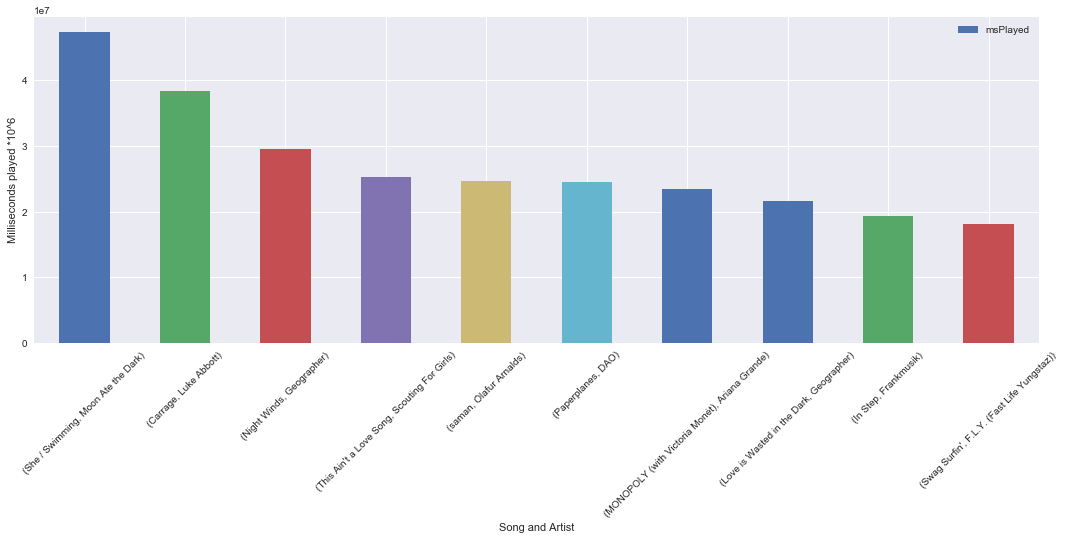

In [18]:
top10.plot(y='msPlayed', kind='bar', figsize=(18,6))
plt.xticks(rotation=45)
plt.xlabel('Song and Artist')
plt.ylabel('Milliseconds played *10^6')

### Hmmm something's odd 
**I don't recognize one of the songs in my top 10, which is odd because it seems that i've listened to it for quite a significant amount of time... Let's investigate further**

In [243]:
fishy = df[df['trackName'] == "Paperplanes"]
fishy.head(50)

,artistName,endTime,msPlayed,trackName,artistPlusTrack,secondsPlayed,minsPlayed,hoursPlayed
5546,DAO,2020-02-06 02:46:00,136363,Paperplanes,DAOPaperplanes,136.363,2.272717,0.037879
5547,DAO,2020-02-06 02:48:00,136363,Paperplanes,DAOPaperplanes,136.363,2.272717,0.037879
5548,DAO,2020-02-06 02:50:00,136363,Paperplanes,DAOPaperplanes,136.363,2.272717,0.037879
5549,DAO,2020-02-06 02:52:00,136363,Paperplanes,DAOPaperplanes,136.363,2.272717,0.037879
5550,DAO,2020-02-06 02:55:00,136363,Paperplanes,DAOPaperplanes,136.363,2.272717,0.037879
5551,DAO,2020-02-06 02:57:00,136363,Paperplanes,DAOPaperplanes,136.363,2.272717,0.037879
5552,DAO,2020-02-06 03:00:00,136363,Paperplanes,DAOPaperplanes,136.363,2.272717,0.037879
5553,DAO,2020-02-06 03:03:00,147470,Paperplanes,DAOPaperplanes,147.470,2.457833,0.040964
5554,DAO,2020-02-06 03:06:00,177910,Paperplanes,DAOPaperplanes,177.910,2.965167,0.049419
5555,DAO,2020-02-06 03:09:00,221387,Paperplanes,DAOPaperplanes,221.387,3.689783,0.061496


- **Looking at the endTime column, it seems that the majortity of these plays occured back to back in one day. Let's investigate further**

In [20]:
fishy['date'] = fishy['endTime'].dt.date
fishy.groupby('date').size()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


date
2020-02-06    169
2020-02-07      1
2020-02-09      2
2020-02-11      1
2020-02-22      1
2020-02-23      2
2020-02-24      3
2020-02-25      2
2020-04-09      2
2020-04-10      1
2020-04-20      1
2020-04-28      1
2020-04-29      1
2020-06-01      1
2020-06-14      1
dtype: int64

### Lets plot this out

Text(0.5, 1.0, 'Night I fell asleep listening to a song on loop')

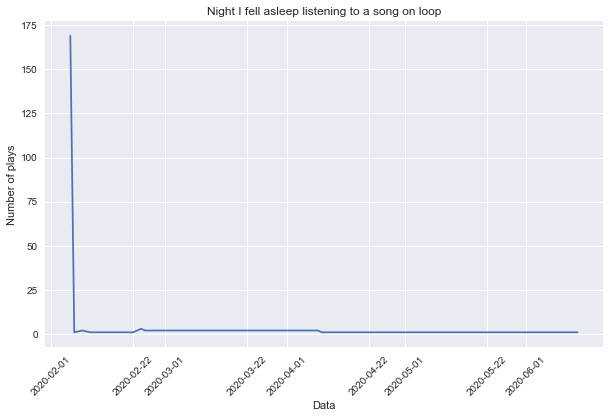

In [21]:
fishy.groupby('date').size().plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.ylabel('Number of plays')
plt.xlabel('Data')
plt.title('Night I fell asleep listening to a song on loop')

- **Interesting, we can see the majority of streams for this track happened on one day. Thinking back I remember that I was very tired one night and in an attempt to set an alarm, I ended up playing this random song, but was too tired to turn it off so I slept through it**

### Feature engineering

**The above graph looks good, however, millisonds played is a bit of a weird metric. Let's create features for seconds, minutes and hours played**

In [22]:
df['secondsPlayed'] = df['msPlayed'].apply(lambda x: x/1000)
df['minsPlayed'] = df['msPlayed'].apply(lambda x: x/60000)
df['hoursPlayed'] = df['secondsPlayed'].apply(lambda x: x/3600)

In [23]:
df.groupby(['trackName','artistName']).sum().sort_values('hoursPlayed',ascending=False).head(10)

,,msPlayed,secondsPlayed,minsPlayed,hoursPlayed
trackName,artistName,,,,
She / Swimming,Moon Ate the Dark,47333218,47333.218,788.886967,13.148116
Carrage,Luke Abbott,38381304,38381.304,639.688400,10.661473
Night Winds,Geographer,29533181,29533.181,492.219683,8.203661
This Ain't a Love Song,Scouting For Girls,25320917,25320.917,422.015283,7.033588
saman,Ólafur Arnalds,24686330,24686.330,411.438833,6.857314
Paperplanes,DAO,24464181,24464.181,407.736350,6.795606
MONOPOLY (with Victoria Monét),Ariana Grande,23449896,23449.896,390.831600,6.513860
Love is Wasted in the Dark,Geographer,21648664,21648.664,360.811067,6.013518
In Step,Frankmusik,19361389,19361.389,322.689817,5.378164


- **Nice! This looks a little more intuitive now**

### Which artists do I stream the most ?

In [24]:
top50artists = df.groupby('artistName').size().sort_values(ascending=False).head(50)
top50artists

artistName
Drake                  722
Chance the Rapper      663
Kid Cudi               635
Young Thug             574
Kanye West             562
Geographer             543
Coldplay               410
Burna Boy              382
Lil Uzi Vert           362
Skepta                 350
Frank Ocean            340
Travis Scott           338
Kendrick Lamar         271
Jai Paul               256
Gunna                  249
Playboi Carti          243
Post Malone            227
JAY-Z                  218
Ólafur Arnalds         215
Akira Kosemura         207
Childish Gambino       203
Lil Wayne              199
The Weeknd             192
Bon Iver               190
K'NAAN                 190
DAO                    189
Moon Ate the Dark      189
Kodak Black            181
Pinegrove              179
Natasha Bedingfield    175
Luke Abbott            169
Roy Woods              156
Beirut                 139
Ariana Grande          138
Arctic Monkeys         138
Arcade Fire            134
SAINt JHN        

Text(0, 0.5, 'Number of streams')

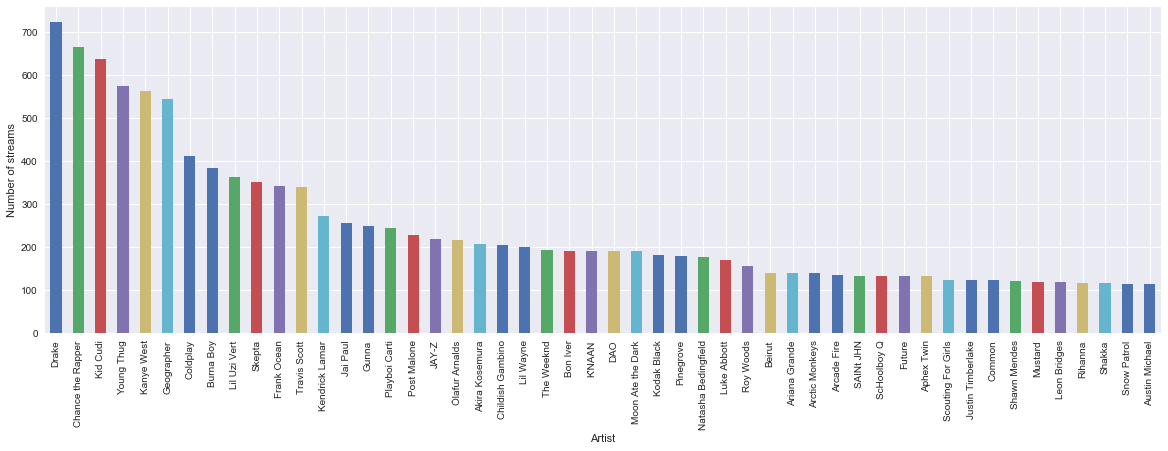

In [25]:
top50artists.plot(kind='bar',figsize=(20,6))
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Number of streams')

### What are the longest tracks I've listened too ?

In [26]:
df.groupby('trackName').min().sort_values('msPlayed',ascending=False).head(20)

,artistName,endTime,msPlayed,artistPlusTrack,secondsPlayed,minsPlayed,hoursPlayed
trackName,,,,,,,
Adam Mosseri,Armchair Expert with Dax Shepard,2020-03-14 23:20:00,7333421,Armchair Expert with Dax ShepardAdam Mosseri,7333.421,122.223683,2.037061
#9 - WE WENT CAMPING,The Misfits Podcast,2019-09-28 13:52:00,6101546,The Misfits Podcast#9 - WE WENT CAMPING,6101.546,101.692433,1.694874
LIVE: Martina McBride,Armchair Expert with Dax Shepard,2020-03-17 16:17:00,5994019,Armchair Expert with Dax ShepardLIVE: Martina ...,5994.019,99.900317,1.665005
Rob Lowe,Armchair Expert with Dax Shepard,2020-04-29 07:41:00,5773354,Armchair Expert with Dax ShepardRob Lowe,5773.354,96.222567,1.603709
Emilia Clarke,Armchair Expert with Dax Shepard,2020-03-16 11:04:00,5070801,Armchair Expert with Dax ShepardEmilia Clarke,5070.801,84.513350,1.408556
104: My Old Lady with Sarah Chalke,"Fake Doctors, Real Friends with Zach and Donald",2020-06-13 23:30:00,4926028,"Fake Doctors, Real Friends with Zach and Donal...",4926.028,82.100467,1.368341
Episode 102: The Welcome Back Parade,Lets Be Honest Podcast,2019-10-14 17:32:00,4823759,Lets Be Honest PodcastEpisode 102: The Welcome...,4823.759,80.395983,1.339933
Kumail Nanjiani,Armchair Expert with Dax Shepard,2020-03-12 04:25:00,4731521,Armchair Expert with Dax ShepardKumail Nanjiani,4731.521,78.858683,1.314311
Julia Louis-Dreyfus,Conan O’Brien Needs A Friend,2020-03-12 05:43:00,4659266,Conan O’Brien Needs A FriendJulia Louis-Dreyfus,4659.266,77.654433,1.294241


- **Looks like spotify includes all my listening history in the data, including podcasts.**

### On average how long do I listen to a track for ?

In [27]:
df.groupby(['trackName','artistName']).sum()['minsPlayed'].mean()

9.379346130846304

- **On average it looks like I listen to a track for about 9 minutes. This is probably skewed due to podcasts being included. So let's find the median instead since its more robust against outliers.**

### What's the median listening time for a track

In [28]:
df.groupby(['trackName','artistName']).sum()['minsPlayed'].median()

3.0618833333333333

- **Great, this looks more realistic.**

### Let's plot a histogram of our listening time

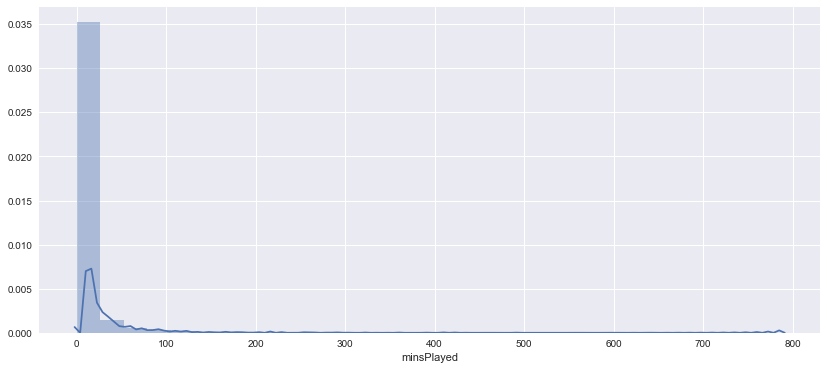

In [29]:
listeningTime = df.groupby(['trackName','artistName']).sum()
plt.figure(figsize=(14,6))
sns.distplot(listeningTime['minsPlayed'], bins=30)

- **It looks like we listen to the majority of songs for around 25 minutes, whilst we hardly listen to any songs for more than 100 mins.**

### Let's zoom into this histogram by limiting our data to only include tracks less than 100 minutes

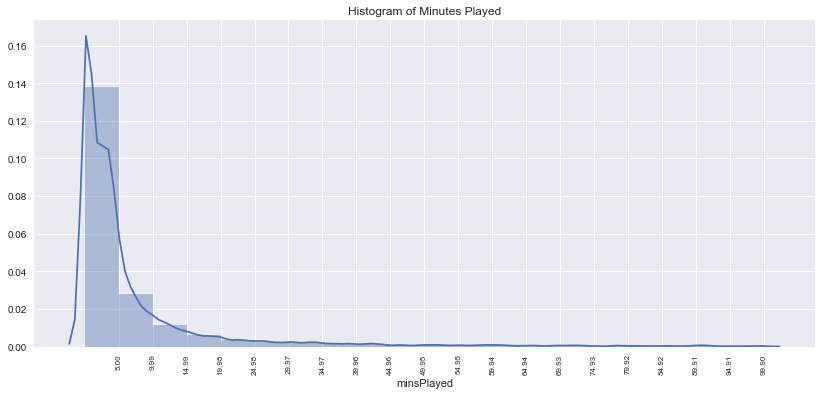

In [30]:
listeningTime = listeningTime[listeningTime['minsPlayed']<100]
plt.figure(figsize=(14,6))
ax = sns.distplot(listeningTime['minsPlayed'], bins=20)
mids = [rect.get_x() + rect.get_width() for rect in ax.patches]
ax.set_xticks(mids)
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Histogram of Minutes Played')

plt.show()

- **Brilliant, we can now see more clearly that the majority of songs will only be listened to between 0 and 5 mins.** 

- **I can use this information to form a defintion of what my favourite songs are e.g. if I listened to song for more than 10 minutes, than I probably liked it**


# Part 2. Access Spotify API

**The streaming data we are currently working with doesn't include addtitional attributes information about the tracks e.g. tempo, loudness etc. This is because spotify expects us to request these features. Thus, to get this information we are going to need to access the spotify API.**

### First, lets install the libraries we'll need

In [32]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install spotipy requests

### Next let's import the relevant libraries and set up our credentials

In [84]:
import spotipy.util as util
import spotipy
from credential import creds #I stored my credential in a secret file

username = creds['username']
client_id = creds['client_id']
client_secret = creds['client_secret']
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

In [85]:
print(token)

BQBcCm0JK0Nrmc5Q6VSOZrZQAsigahBC6nB0Tno5ppXmpd--HjLxq_Kl1eP7mupe4qMvBBX4J3WepPQCJw__DQh7xbNxfmmVFK7x3ofcnf5qp8uE17x6yU3argC3Zh17QSfeQX-qDFTfhaQ1eMOuOMizJ0Tro9a17Q


### Let's create a function to get the track IDs 
**Remember we want to get more features for each of our songs. To do this, first we need to get each tracks ID**

In [89]:
import requests
def get_id(track_name: str, token: str, artist: str) -> str:
    headers = {
        'Accept': 'application/json',
        'Content-Type': 'application/json',
        'Authorization': f'Bearer ' + token}
    params = [
        ('q', track_name),
        ('type', 'track'),
        ('type', 'artist')
    ]
    try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        for i in range(len(json['tracks']['items'])):
            if json['tracks']['items'][i]['artists'][0]['name'] == artist:
                result = json['tracks']['items'][i]
                track_id = result['id']
                return track_id
    except:
        return None
    


### Let's test to see if our function works

In [90]:
track_id = get_id('Get Lucky', token, "Daft Punk")
print(track_id)

2Foc5Q5nqNiosCNqttzHof


**Great it does!**

### Now we have our track ID, we can now get some metadata for each of our tracks.

In [93]:
def get_features(track_id: str, token: str) -> dict:
    sp = spotipy.Spotify(auth=token)
    try:
        features = sp.audio_features([track_id])
        return features[0]
    except:
        return None

### Let's test this out for the track we just generated

In [94]:
track_features = get_features(track_id, token)
print(track_features)

{'danceability': 0.794, 'energy': 0.811, 'key': 6, 'loudness': -8.966, 'mode': 0, 'speechiness': 0.038, 'acousticness': 0.0426, 'instrumentalness': 1.07e-06, 'liveness': 0.101, 'valence': 0.862, 'tempo': 116.047, 'type': 'audio_features', 'id': '2Foc5Q5nqNiosCNqttzHof', 'uri': 'spotify:track:2Foc5Q5nqNiosCNqttzHof', 'track_href': 'https://api.spotify.com/v1/tracks/2Foc5Q5nqNiosCNqttzHof', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Foc5Q5nqNiosCNqttzHof', 'duration_ms': 248413, 'time_signature': 4}


**Excellent, it also works!**

### Putting it all together
**Now let's get the trackIDs and metadata for each unique track**

**First, lets create a dictionary we can continously update**

In [41]:
metadata = {
    'id': [],
    'danceability': [],
    'energy': [],
    'key': [],
    'loudness': [],
    'speechiness': [],
    'acousticness': [],
    'instrumentalness': [],
    'liveness': [],
    'valence': [],
    'tempo': [],
    'type': [],
    'duration_ms': []
}

### Get track IDs

In [44]:
from tqdm import tqdm # this library provides a loading bar which will help us get a sense on how long this'll take

for artist, track in tqdm(zip(uniqueTracksDf['artistName'],uniqueTracksDf['trackName']), total=len(uniqueTracksDf['artistName'])):
    try:
        metadata['id'].append(get_id(track, token, artist))
    except:
        metadata['id'].append(None)
#         metadata['id'].append('Missing')


100%|██████████| 8417/8417 [38:42<00:00,  3.62it/s]  


### Check to see if the number of track IDs we have matches the number of unique tracks

In [45]:
len(metadata['id']) == len(uniqueTracksDf)

True

### Get song metadata

In [ ]:
for track_id in tqdm(metadata['id']):
    try:
        track_features = get_features(track_id, token)
        metadata['danceability'].append(track_features['danceability'])
        metadata['energy'].append(track_features['energy'])
        metadata['key'].append(track_features['key'])
        metadata['loudness'].append(track_features['loudness'])
        metadata['speechiness'].append(track_features['speechiness'])
        metadata['acousticness'].append(track_features['acousticness'])
        metadata['instrumentalness'].append(track_features['instrumentalness'])
        metadata['liveness'].append(track_features['liveness'])
        metadata['valence'].append(track_features['valence'])
        metadata['tempo'].append(track_features['tempo'])
        metadata['type'].append(track_features['type'])
        metadata['duration_ms'].append(track_features['duration_ms'])
    except:
        metadata['danceability'].append(None)
        metadata['energy'].append(None)
        metadata['key'].append(None)
        metadata['loudness'].append(None)
        metadata['speechiness'].append(None)
        metadata['acousticness'].append(None)
        metadata['instrumentalness'].append(None)
        metadata['liveness'].append(None)
        metadata['valence'].append(None)
        metadata['tempo'].append(None)
        metadata['type'].append(None)
        metadata['duration_ms'].append(None)

### Check that lenghts of each attribute are the same

In [96]:
for i in metadata.keys():
    print(len(metadata[i]))
    

8417
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Convert our metadata dictionary into a dataframe

In [ ]:
metadata_df = pd.DataFrame(metadata)
metadata_df.head()

### Save our metadata as a csv so we don't lose it

In [ ]:
# metadata_df.to_csv('metadata.csv')

In [199]:
# metadata_df = pd.read_csv('metadata.csv')

### Concatenate our two datasets together

In [200]:
metadata_df.reset_index(inplace=True, drop=True)
uniqueTracksDf.reset_index(inplace=True, drop=True)

In [201]:
final = pd.concat([uniqueTracksDf,metadata_df],axis=1)

In [202]:
final.head()

,artistName,endTime,msPlayed,trackName,artistPlusTrack,Unnamed: 0,id,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,The Revivalists,2019-06-21 17:37:00,24008,Wish I Knew You,The RevivalistsWish I Knew You,0,2EWpa5XnAuSn0sIkSSIhYk,0.649,0.718,0.0,...,0.0,0.0261,0.14200,0.071300,0.1240,0.718,101.034,audio_features,274093.0,4.0
1,The Game,2019-06-30 23:54:00,277025,Dreams,The GameDreams,1,5F7caGhe84C6ONva5S8yXF,0.630,0.780,6.0,...,1.0,0.2210,0.00499,0.000000,0.2060,0.281,155.779,audio_features,286453.0,4.0
2,The Hundred In The Hands,2019-07-01 18:29:00,211586,Dressed In Dresden,The Hundred In The HandsDressed In Dresden,2,3axp4dcei5PDShQZTCRdn1,0.673,0.693,9.0,...,0.0,0.0993,0.00100,0.744000,0.1650,0.795,153.982,audio_features,211587.0,4.0
3,Tennis,2019-07-01 18:30:00,1770,Marathon,TennisMarathon,3,2Zi216Zlq47fisSvk3eEN7,0.548,0.397,9.0,...,0.0,0.0274,0.95600,0.000074,0.1090,0.780,160.882,audio_features,165467.0,4.0
4,Mase,2019-07-01 18:30:00,95945,Feel so Good,MaseFeel so Good,4,7hfRrdFJgFKK3cJ4rmkecE,0.821,0.703,11.0,...,0.0,0.2400,0.19200,0.000000,0.0816,0.536,105.154,audio_features,203627.0,4.0


**Not sure what the unnamed column is about. We don't need it in any case so let's drop it**

In [203]:
final.drop('Unnamed: 0', axis=1, inplace=True)

In [204]:
final.head()

,artistName,endTime,msPlayed,trackName,artistPlusTrack,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,The Revivalists,2019-06-21 17:37:00,24008,Wish I Knew You,The RevivalistsWish I Knew You,2EWpa5XnAuSn0sIkSSIhYk,0.649,0.718,0.0,-6.593,0.0,0.0261,0.14200,0.071300,0.1240,0.718,101.034,audio_features,274093.0,4.0
1,The Game,2019-06-30 23:54:00,277025,Dreams,The GameDreams,5F7caGhe84C6ONva5S8yXF,0.630,0.780,6.0,-5.353,1.0,0.2210,0.00499,0.000000,0.2060,0.281,155.779,audio_features,286453.0,4.0
2,The Hundred In The Hands,2019-07-01 18:29:00,211586,Dressed In Dresden,The Hundred In The HandsDressed In Dresden,3axp4dcei5PDShQZTCRdn1,0.673,0.693,9.0,-5.668,0.0,0.0993,0.00100,0.744000,0.1650,0.795,153.982,audio_features,211587.0,4.0
3,Tennis,2019-07-01 18:30:00,1770,Marathon,TennisMarathon,2Zi216Zlq47fisSvk3eEN7,0.548,0.397,9.0,-8.117,0.0,0.0274,0.95600,0.000074,0.1090,0.780,160.882,audio_features,165467.0,4.0
4,Mase,2019-07-01 18:30:00,95945,Feel so Good,MaseFeel so Good,7hfRrdFJgFKK3cJ4rmkecE,0.821,0.703,11.0,-8.464,0.0,0.2400,0.19200,0.000000,0.0816,0.536,105.154,audio_features,203627.0,4.0


### Check for missing values - I found some tracks were returning None for ID so we can expect some

In [205]:
final.isna().sum()
#830 null values

artistName            0
endTime               0
msPlayed              0
trackName             0
artistPlusTrack       0
id                  830
danceability        830
energy              830
key                 830
loudness            830
mode                830
speechiness         830
acousticness        830
instrumentalness    830
liveness            830
valence             830
tempo               830
type                830
duration_ms         830
time_signature      830
dtype: int64

**Not too many missing values, so we can afford to drop them**

### Drop missing values

In [206]:
final = final.dropna()

In [207]:
final.isna().sum()

artistName          0
endTime             0
msPlayed            0
trackName           0
artistPlusTrack     0
id                  0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
dtype: int64

**No more missing values. Great!**

In [208]:
final.shape

(7587, 20)

**We have 7587 tracks in our final dataset.**

# Part 3. Unsupervised Learning

**The aim of this project is to use an unsupervised learning algorithm to try and cluster my favourite songs into playlists of simialr songs. In order to do this however, we first need to decide how to define 'favoruite'**

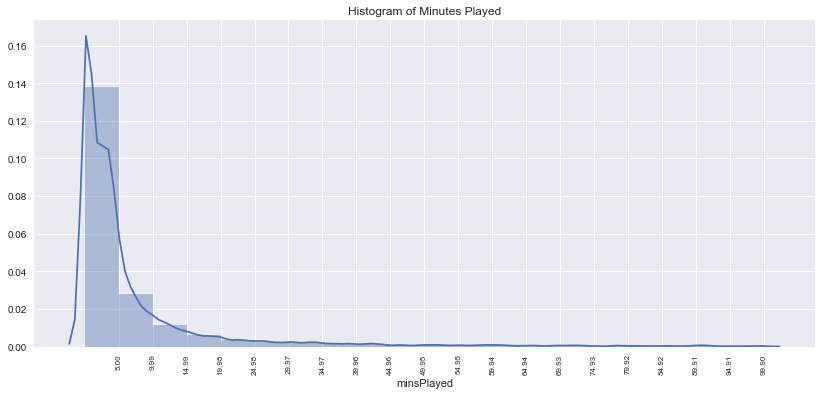

In [209]:
listeningTime = listeningTime[listeningTime['minsPlayed']<100]
plt.figure(figsize=(14,6))
ax = sns.distplot(listeningTime['minsPlayed'], bins=20)
mids = [rect.get_x() + rect.get_width() for rect in ax.patches]
ax.set_xticks(mids)
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Histogram of Minutes Played')

plt.show()

**Earlier, we saw that I listen to most songs for about 0-5 minutes total. This tells me that I didn't like these songs very much since I haven't spent much time listening to them. The histogram above shows a massive drop with songs listened to for more than 5 minutes. Let's use this as our definition of whether i enjoyed a song.**

### Limit df to only include songs I've listened to for more than 5 minutes

In [210]:
final['minutesPlayed'] = final['msPlayed']/60000

In [211]:
final.head()

,artistName,endTime,msPlayed,trackName,artistPlusTrack,id,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,minutesPlayed
0,The Revivalists,2019-06-21 17:37:00,24008,Wish I Knew You,The RevivalistsWish I Knew You,2EWpa5XnAuSn0sIkSSIhYk,0.649,0.718,0.0,-6.593,...,0.0261,0.14200,0.071300,0.1240,0.718,101.034,audio_features,274093.0,4.0,0.400133
1,The Game,2019-06-30 23:54:00,277025,Dreams,The GameDreams,5F7caGhe84C6ONva5S8yXF,0.630,0.780,6.0,-5.353,...,0.2210,0.00499,0.000000,0.2060,0.281,155.779,audio_features,286453.0,4.0,4.617083
2,The Hundred In The Hands,2019-07-01 18:29:00,211586,Dressed In Dresden,The Hundred In The HandsDressed In Dresden,3axp4dcei5PDShQZTCRdn1,0.673,0.693,9.0,-5.668,...,0.0993,0.00100,0.744000,0.1650,0.795,153.982,audio_features,211587.0,4.0,3.526433
3,Tennis,2019-07-01 18:30:00,1770,Marathon,TennisMarathon,2Zi216Zlq47fisSvk3eEN7,0.548,0.397,9.0,-8.117,...,0.0274,0.95600,0.000074,0.1090,0.780,160.882,audio_features,165467.0,4.0,0.029500
4,Mase,2019-07-01 18:30:00,95945,Feel so Good,MaseFeel so Good,7hfRrdFJgFKK3cJ4rmkecE,0.821,0.703,11.0,-8.464,...,0.2400,0.19200,0.000000,0.0816,0.536,105.154,audio_features,203627.0,4.0,1.599083


In [212]:
final = final[final['minutesPlayed']>5]

In [213]:
final.shape

(448, 21)

### Check to see if that worked ?

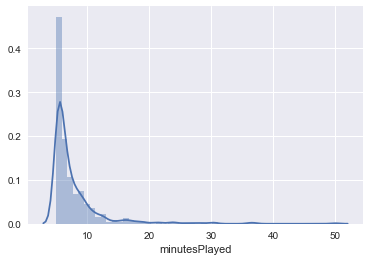

In [244]:
sns.distplot(final['minutesPlayed'])

**Great, it worked**

In [215]:
final.columns

Index(['artistName', 'endTime', 'msPlayed', 'trackName', 'artistPlusTrack',
       'id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'minutesPlayed'],
      dtype='object')

### Feature selection

In [216]:
X = final[['danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness',
         'valence', 'tempo']]


In [217]:
X.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
9,0.522,0.800,7.0,-6.289,0.0307,0.000817,0.00143,0.2060,0.0460,130.953
13,0.713,0.877,1.0,-6.650,0.0399,0.010100,0.00000,0.0957,0.8180,159.997
90,0.722,0.687,0.0,-5.189,0.0556,0.009490,0.00413,0.0462,0.6190,128.013
113,0.667,0.747,1.0,-7.059,0.1890,0.337000,0.00000,0.1150,0.9180,86.917
131,0.232,0.349,4.0,-10.480,0.0328,0.553000,0.90300,0.0707,0.0371,85.940


**We'll use these features to perform some clustering**

### Scale certain features
**Key, loudness and tempo are the only features that are not between 0 and 1. Let's scale them using minmax scaler before we proceed**

In [218]:
from sklearn import preprocessing 
scaler=preprocessing.MinMaxScaler()

In [219]:
unscaled_feaures = X[["key","loudness","tempo"]].values

In [220]:
scaled=scaler.fit_transform(unscaled_feaures)

In [221]:
scaled_df = pd.DataFrame(scaled,columns=[["key","loudness","tempo"]] )

In [222]:
scaled_df.head()

,key,loudness,tempo
0,0.636364,0.851877,0.487618
1,0.090909,0.840414,0.688577
2,0.000000,0.886804,0.467276
3,0.090909,0.827427,0.182928
4,0.363636,0.718804,0.176168


In [223]:
X['key'] = scaled_df['key'].values
X['loudness'] = scaled_df['loudness'].values
X['tempo'] = scaled_df['tempo'].values

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [224]:
X.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
9,0.522,0.800,0.636364,0.851877,0.0307,0.000817,0.00143,0.2060,0.0460,0.487618
13,0.713,0.877,0.090909,0.840414,0.0399,0.010100,0.00000,0.0957,0.8180,0.688577
90,0.722,0.687,0.000000,0.886804,0.0556,0.009490,0.00413,0.0462,0.6190,0.467276
113,0.667,0.747,0.090909,0.827427,0.1890,0.337000,0.00000,0.1150,0.9180,0.182928
131,0.232,0.349,0.363636,0.718804,0.0328,0.553000,0.90300,0.0707,0.0371,0.176168


### Turn X data frame into numpy array so we can run the K means clustering algorithm 

In [225]:
features=X.values

In [226]:
features.shape

(448, 10)

# Clustering

### Choosing the right number for K


In [289]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,21) #let's use elbow method to find the optimal K
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(features)
    Sum_of_squared_distances.append(model.inertia_)
    print(f'Completed:{k}')

Completed:1
Completed:2
Completed:3
Completed:4
Completed:5
Completed:6
Completed:7
Completed:8
Completed:9
Completed:10
Completed:11
Completed:12
Completed:13
Completed:14
Completed:15
Completed:16
Completed:17
Completed:18
Completed:19
Completed:20


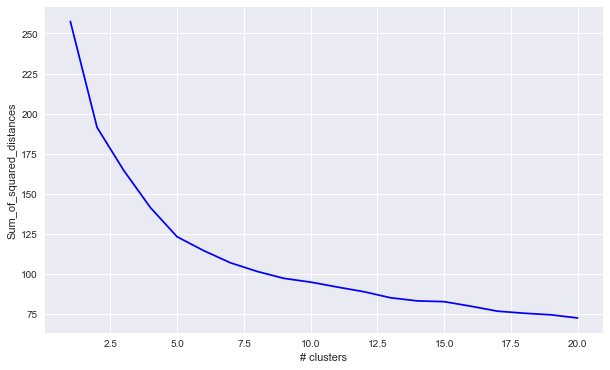

In [290]:
import matplotlib.pyplot as plt #Elbow method
plt.figure(figsize=(10,6))
plt.plot(list(range(1,21)),Sum_of_squared_distances,'bx-')
plt.ylabel('Sum_of_squared_distances')
plt.xlabel('# clusters')
plt.show()

**4 looks to be a good number**

In [291]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model = model.fit(features)

### Get predictions

In [292]:
predictions=model.predict(features)

In [293]:
predictions

array([2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 0, 0, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 3, 2, 1, 1, 1, 0, 3, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 3, 1, 2, 0, 1, 1, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 1, 2, 0, 2, 1, 2, 1, 3, 1, 0, 1, 3, 3, 3, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 0, 3, 1,
       3, 3, 2, 3, 0, 1, 3, 2, 3, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 3, 3,
       0, 0, 0, 2, 2, 1, 1, 3, 2, 3, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 3, 2, 2,
       1, 2, 1, 3, 3, 3, 0, 1, 1, 3, 0, 3, 1, 0, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 2, 3, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 1, 2, 3, 0, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 0, 3, 0, 0, 0, 1, 2, 0, 2, 2, 3, 2, 2, 3,

In [294]:
final.shape

(448, 22)

In [295]:
final['cluster'] = predictions

**Looks like the majority of songs are placed in clusters 0 and 3. Whilst clusters 4 and 1 have the fewest allocations.**

In [296]:
final.groupby('cluster').size()

cluster
0     54
1    123
2    178
3     93
dtype: int64

In [254]:
final.groupby('cluster').mean()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,minutesPlayed
cluster,,,,,,,,,,,,,,,
0,471949.769663,0.657174,0.624871,7.775281,-7.734258,0.612360,0.139301,0.223177,0.020358,0.193606,0.543467,118.367303,271911.842697,3.966292,7.865829
1,516542.991870,0.644024,0.678033,1.406504,-7.029163,0.747967,0.153955,0.160801,0.024830,0.205083,0.491192,120.183675,286314.983740,3.951220,8.609050
2,412545.851852,0.679167,0.717778,5.962963,-9.042037,0.407407,0.060756,0.123787,0.760426,0.161396,0.434604,121.416981,373267.444444,4.000000,6.875764
3,447738.387097,0.446335,0.298104,4.774194,-15.029581,0.634409,0.049263,0.839387,0.476978,0.156739,0.203001,119.041656,327595.161290,3.827957,7.462306


In [311]:
final[final['cluster']==0]

,artistName,endTime,msPlayed,trackName,artistPlusTrack,id,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,minutesPlayed,cluster
270,Floating Points,2019-07-03 22:22:00,594639,ARP3,Floating PointsARP3,18A3Au2LzZ8bRqrDUjyVlJ,0.824,0.596,5.0,-10.380,...,0.037200,0.918,0.0751,0.2700,124.943,audio_features,560810.0,4.0,9.910650,0
271,Floating Points,2019-07-03 22:35:00,786611,Myrtle Avenue,Floating PointsMyrtle Avenue,44rPgj9ui5GLYkcFSDItYw,0.741,0.615,6.0,-14.987,...,0.309000,0.892,0.0948,0.0660,114.998,audio_features,602500.0,4.0,13.110183,0
1424,Avicii,2019-08-01 09:31:00,342303,Levels - Radio Edit,AviciiLevels - Radio Edit,5UqCQaDshqbIk3pkhy4Pjg,0.584,0.889,1.0,-5.941,...,0.046200,0.828,0.3090,0.4640,126.040,audio_features,199907.0,4.0,5.705050,0
1494,Aufgang,2019-08-03 12:06:00,423104,Channel 7 (You and Me) - John Talabot Remix,AufgangChannel 7 (You and Me) - John Talabot R...,4jxPEWcj748Z9pDCP0emzv,0.643,0.966,10.0,-8.739,...,0.017200,0.908,0.1490,0.8750,114.012,audio_features,478288.0,4.0,7.051733,0
1755,Kerri Chandler,2019-08-11 14:59:00,483840,Atmosphere,Kerri ChandlerAtmosphere,339dwcSBa8oxVZxicvJG3c,0.831,0.766,8.0,-8.949,...,0.032900,0.856,0.1100,0.5510,122.019,audio_features,483840.0,4.0,8.064000,0
1757,Miguel Migs,2019-08-11 15:07:00,385000,Broken Barriers,Miguel MigsBroken Barriers,2BWyWLBwIfeEESOamq1X1a,0.835,0.870,5.0,-5.985,...,0.000519,0.387,0.3170,0.6980,121.995,audio_features,385000.0,4.0,6.416667,0
1763,Ralf Gum,2019-08-11 15:25:00,429789,Take Me to My Love - Album Instrumental,Ralf GumTake Me to My Love - Album Instrumental,1wicRfbJMcUiN6SYTBW5HW,0.801,0.456,10.0,-11.849,...,0.023600,0.860,0.0950,0.5690,125.084,audio_features,512002.0,4.0,7.163150,0
1803,Daphni,2019-08-12 22:35:00,321713,Sizzling,DaphniSizzling,7AkuWVEfviEjaNa8ps3uVw,0.711,0.927,2.0,-8.194,...,0.000460,0.832,0.0506,0.4600,132.029,audio_features,321713.0,4.0,5.361883,0
2090,Tove Lo,2019-08-25 19:46:00,515619,Stay High - Habits Remix,Tove LoStay High - Habits Remix,5JCi3pyggvk4B0yd0BK3ow,0.736,0.677,4.0,-7.036,...,0.001140,0.844,0.0949,0.0747,121.010,audio_features,258387.0,4.0,8.593650,0
2282,Maribou State,2019-08-31 12:03:00,876658,Feel Good (feat. Khruangbin),Maribou StateFeel Good (feat. Khruangbin),3PURbsY67tLMyausOABtit,0.566,0.757,4.0,-8.370,...,0.328000,0.840,0.3960,0.4030,102.016,audio_features,267201.0,4.0,14.610967,0


# Principle component analysis (PCA)



**PCA reduces the dimension of our data. The method derives point in an n dimentional space from our data which are uncorrelated.**

In [303]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)

In [304]:
pca_result = pca.fit_transform(features)

In [305]:
pca_df=pd.DataFrame(pca_result, columns=['x','y'])

In [306]:
pca_df['cluster']=predictions

In [307]:
pca_df.head()

,x,y,cluster
0,-0.236803,0.115712,2
1,-0.560897,-0.287728,1
2,-0.435915,-0.403281,1
3,-0.351084,-0.349906,1
4,0.828912,0.030960,3


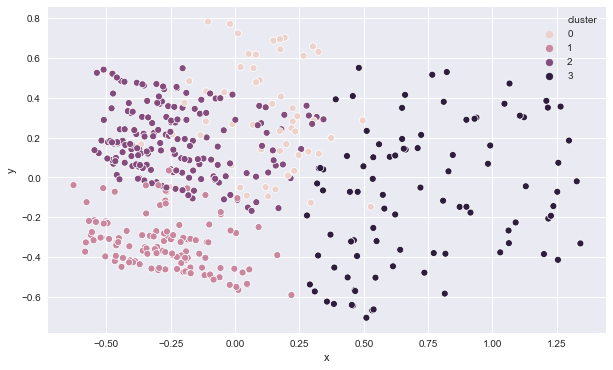

In [309]:
plt.figure(figsize=(10,6))
sns.scatterplot(pca_df['x'],pca_df['y'], hue=pca_df['cluster'])

**There seems to be a bit of noise between clusters 2 and 0. Inspecting these songs, they are somewhat silimar which explains why this is happening**